# Introduction 🌟

The dataset is taken over 2-month period in India. It has 400 rows with 25 features like red blood cells, pedal edema, sugar,etc. The aim is to classify whether a patient has chronic kidney disease or not. The classification is based on a attribute named 'classification' which is either 'ckd'(chronic kidney disease) or 'notckd. I've performed cleaning of the dataset which includes mapping the text to numbers and some other changes. After the cleaning I've done some EDA(Exploratory Data Analysis) and then I've divided the dataset int training and testing and applied the models on them. It is observed that the classification results are not much satisfying initially. So, instead of dropping the rows with Nan values I've used the lambda function to replace them with mode for each column. After that I've divided the dataset again into training and testing sets and applied models on them. This time the results are better and we see that the random forest and decision trees are the best performers with an accuracy of 1.0 and 0 misclassifications. The performance of the classification is measured by printing confusion matrix, classification report and accuracy.

## Metadata

We use the following representation to collect the dataset

            age		-	age	
			bp		-	blood pressure
			sg		-	specific gravity
			al		-   	albumin
			su		-	sugar
			rbc		-	red blood cells (normal = 1 and abnormal = 0)
			pc		-	pus cell (normal = 1 and abnormal = 0)
			pcc		-	pus cell clumps (notpresent = 0 and present = 1)
			ba		-	bacteria (notpresent = 0 and present = 1)
			bgr		-	blood glucose random
			bu		-	blood urea
			sc		-	serum creatinine
			sod		-	sodium
			pot		-	potassium
			hemo		-	hemoglobin
			pcv		-	packed cell volume
			wc		-	white blood cell count
			rc		-	red blood cell count
			htn		-	hypertension (yes = 1 and no = 0)
			dm		-	diabetes mellitus (yes = 1 and no = 0)
			cad		-	coronary artery disease (yes = 1 and no = 0)
			appet		-	appetite (good = 1 and poor = 0)
			pe		-	pedal edema (yes = 1 and no = 0)
			ane		-	anemia (yes = 1 and no = 0)
			class		-	class (ckd = 0 and notckd = 1)

## Import libraries

In [1]:
#data manipulation libraries
import pandas as pd
import numpy as np

#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#remove warnings
import warnings
warnings.filterwarnings("ignore")

#imbalanced to balanced
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from collections import Counter

## Loading Data

In [2]:
# reading the  dataset

df = pd.read_csv("kidney_disease.csv")

#overview of the dataset
df.head(15)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


## Data Cleaning

### Dataframe Shape

In [3]:
# what is the number of record and features we got?

print(f'Number of Records: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Records: 400
Number of Features: 26


### Basic information of the data¶

In [4]:
#chech basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

### Missing Values of Data

In [5]:
# chack for null values
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

### Descriptive Statistics

In [6]:
# check for descriptive statistics
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


### unique values

In [7]:
for i in df.columns:
    print(f'The unique values for the feature {i} are:')
    print(f'{df[i].unique()} total is :- {df[i].nunique()}')
    print('\n--------------------\n')

The unique values for the feature id are:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 

### Drop id Column

In [8]:
df.drop('id',axis=1,inplace=True)

### Canvat object to numeric

In [9]:
cols = ['pcv', 'wc', 'rc']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

### Remove the space and anothar value

In [10]:
print('The unique values for the feature dm are :- ', df['dm'].unique())
print('-----------------------------------')
print('The unique values for the feature cad are :- ', df['cad'].unique())
print('-----------------------------------')
print('The unique values for the feature classification are :- ', df['classification'].unique())
print('-----------------------------------')

The unique values for the feature dm are :-  ['yes' 'no' ' yes' '\tno' '\tyes' nan]
-----------------------------------
The unique values for the feature cad are :-  ['no' 'yes' '\tno' nan]
-----------------------------------
The unique values for the feature classification are :-  ['ckd' 'ckd\t' 'notckd']
-----------------------------------


In [11]:
# df['dm'] = df['dm'].replace({' yes':'yes', '\tno':'no', '\tyes':'yes'})

df[['dm', 'cad', 'classification']] = df[['dm', 'cad', 'classification']].apply(lambda x: x.str.strip())

In [12]:
print('The unique values for the feature dm are :- ', df['dm'].unique())
print('-----------------------------------')
print('The unique values for the feature cad are :- ', df['cad'].unique())
print('-----------------------------------')
print('The unique values for the feature classification are :- ', df['classification'].unique())
print('-----------------------------------')

The unique values for the feature dm are :-  ['yes' 'no' nan]
-----------------------------------
The unique values for the feature cad are :-  ['no' 'yes' nan]
-----------------------------------
The unique values for the feature classification are :-  ['ckd' 'notckd']
-----------------------------------


### Devad number and catgari column

In [13]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

### fill value is numberic column 

In [14]:
for i in cat_cols:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [15]:
df[cat_cols].isnull().sum()

rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

### fill value is catgari column

In [16]:
for i in num_cols:
    df[i].fillna(df[i].mean(),inplace=True)

In [17]:
df[num_cols].isnull().sum()

age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wc      0
rc      0
dtype: int64

## Data Visualization (EDA)

### Histogram of Age

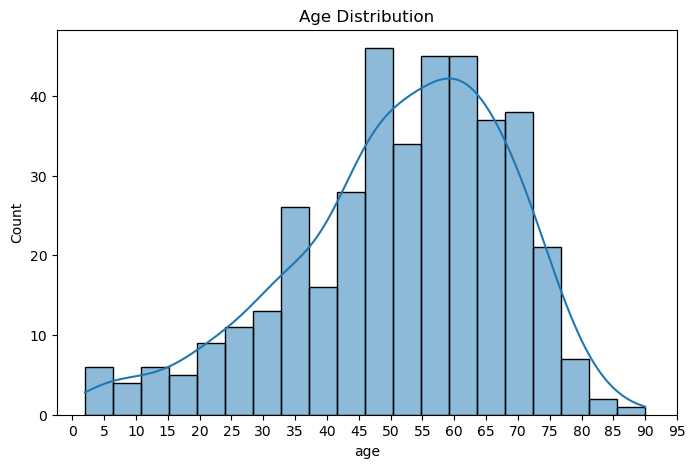

In [18]:
plt.figure(figsize=(8,5))

sns.histplot(x=df['age'], kde=True, bins=20)

plt.xticks(np.arange(0,100,5))
plt.title("Age Distribution")
plt.show()

### Histogram of blood pressure (bp)

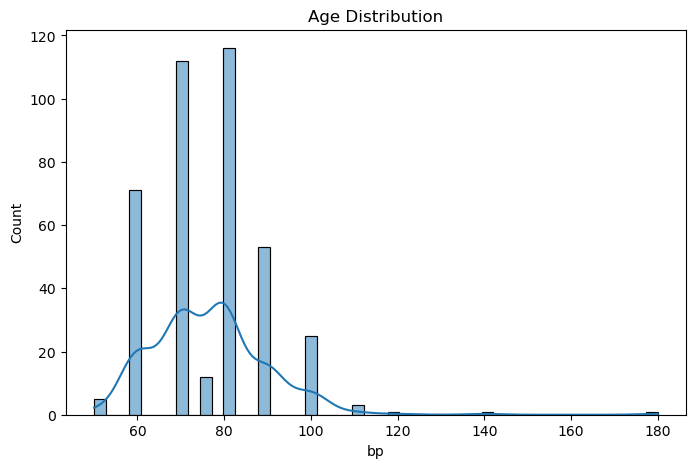

In [19]:
plt.figure(figsize=(8,5))

sns.histplot(x=df['bp'], kde=True)

plt.title("Age Distribution")
plt.show()

### Histogram of al

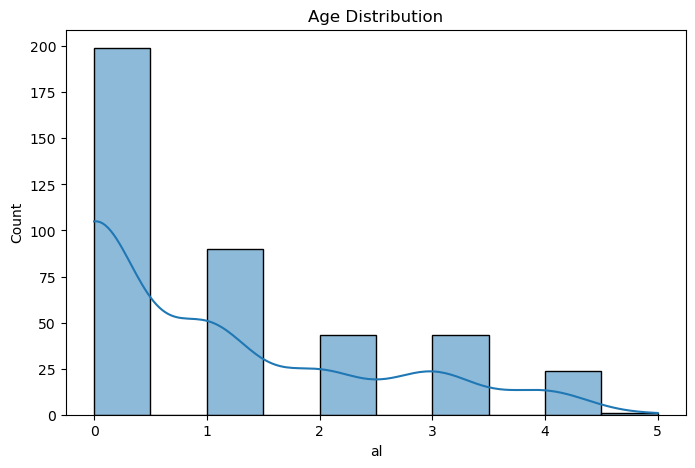

In [20]:
plt.figure(figsize=(8,5))

sns.histplot(x=df['al'], kde=True)

plt.title("Age Distribution")
plt.show()

### Histogram of bgr

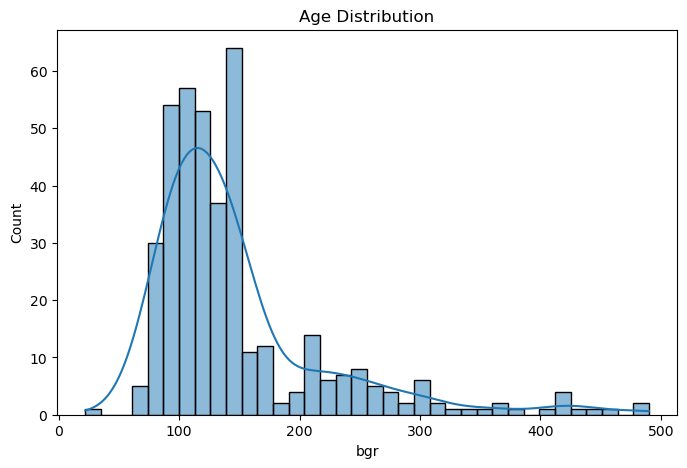

In [21]:
plt.figure(figsize=(8,5))

sns.histplot(x=df['bgr'], kde=True)

plt.title("Age Distribution")
plt.show()

### Histogram of bu

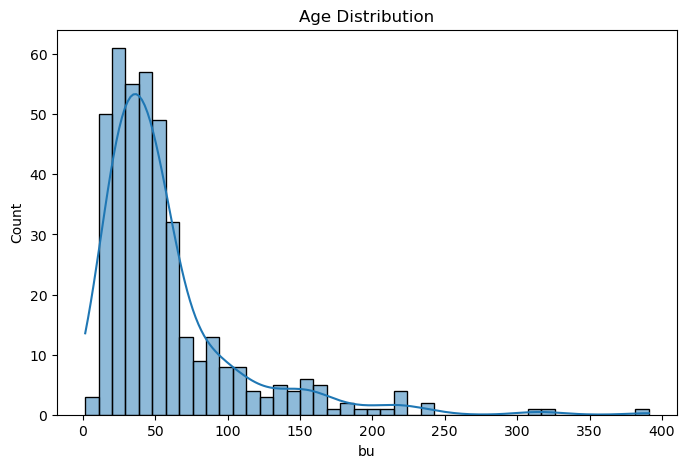

In [22]:
plt.figure(figsize=(8,5))

sns.histplot(x=df['bu'], kde=True)

plt.title("Age Distribution")
plt.show()

### Histogram of bu

In [23]:
df.groupby(['classification'])['age'].value_counts()

classification  age 
ckd             60.0    15
                65.0    15
                48.0     9
                50.0     9
                54.0     9
                        ..
notckd          68.0     1
                69.0     1
                72.0     1
                74.0     1
                79.0     1
Name: count, Length: 129, dtype: int64

In [24]:
for i in num_cols:
    print(i)

age
bp
sg
al
su
bgr
bu
sc
sod
pot
hemo
pcv
wc
rc


#### Countplot of categar columns

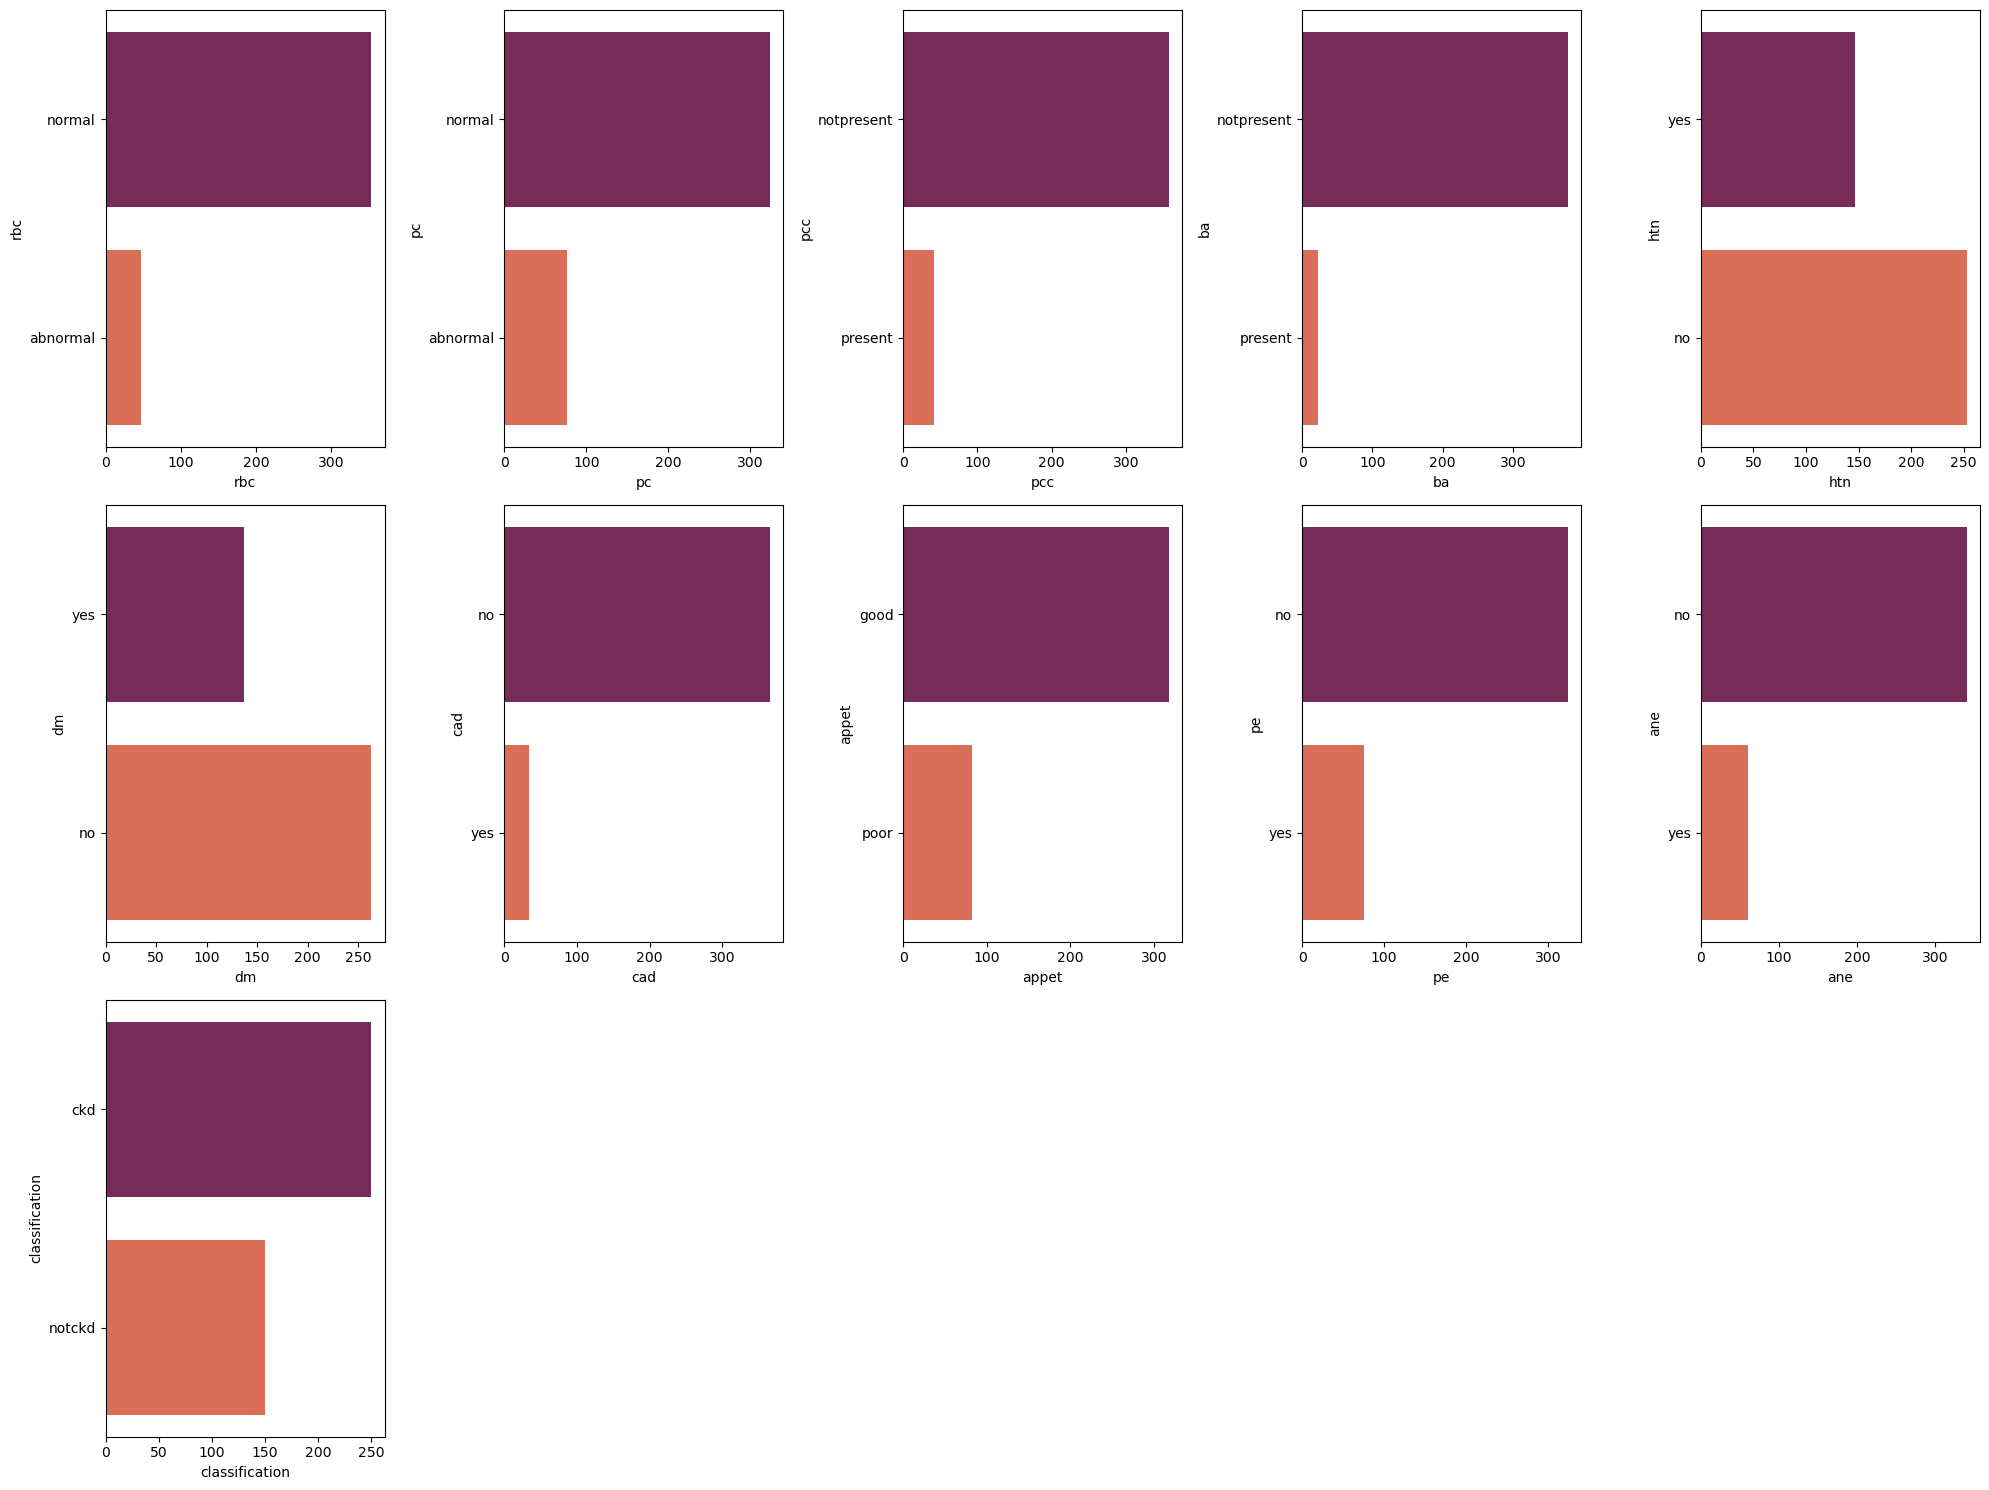

In [25]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.countplot(df[column] ,palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

#### Boxplot of age and classification

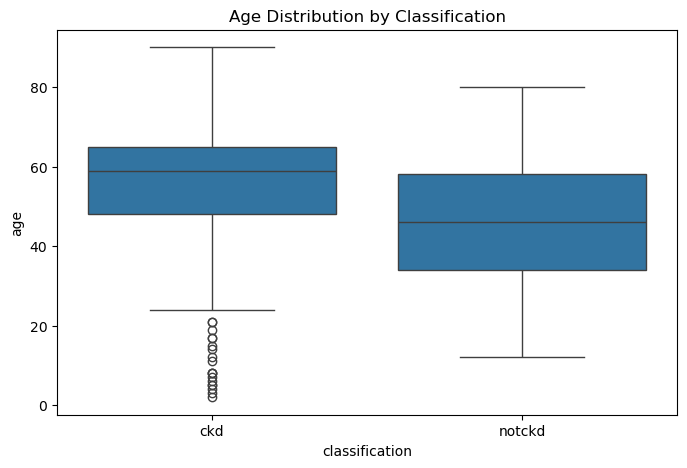

In [26]:
plt.figure(figsize = (8, 5))

sns.boxplot(x="classification",y="age",data=df)

plt.title('Age Distribution by Classification')
plt.show()

#### Pieplot of classification

classification
ckd       250
notckd    150
Name: count, dtype: int64


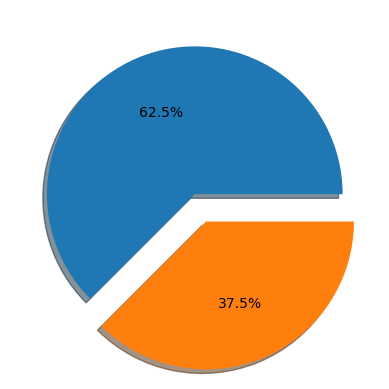

In [27]:
a = df['classification'].value_counts()
print(a)

plt.pie(a, explode=[0,0.2], autopct="%0.1f%%",shadow=True)
plt.show()

In [28]:
mean = df.pot.mean()
std = df.pot.std()

In [29]:
mean - 3 * std

-3.832104262109902

In [30]:
mean + 3 * std

13.086591441597083

In [31]:
df[(df.pot<-3.83) | (df.pot>13.08)]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
61,67.0,80.0,1.010,1.0,3.0,normal,abnormal,notpresent,notpresent,182.0,...,38.884498,8406.122449,4.707435,no,no,no,good,yes,no,ckd
128,52.0,90.0,1.015,4.0,3.0,normal,abnormal,notpresent,notpresent,224.0,...,23.000000,5000.000000,2.900000,yes,yes,no,good,no,yes,ckd


In [32]:
df.pot.loc[61]

39.0

In [33]:
df.pot.loc[128]

47.0

In [34]:
df.loc[[61, 128], 'pot'] = [3.9,4.7]

In [35]:
df.pot.loc[61]

3.9

In [36]:
df.pot.loc[128]

4.7

In [37]:
df['classification'].drop_duplicates().sort_values()

0         ckd
250    notckd
Name: classification, dtype: object

In [38]:
df['classification'].drop_duplicates().sort_values()


0         ckd
250    notckd
Name: classification, dtype: object

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in cat_cols:
    df[i] = le.fit_transform(df[i])

In [40]:
df['classification'].value_counts()

classification
0    250
1    150
Name: count, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=25)

In [42]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_smote,Y_train_smote = smote.fit_resample(X_train,Y_train)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sts = scaler.fit_transform(X_train_smote)
X_test_sts = scaler.transform(X_test)

In [44]:
from sklearn.linear_model import LogisticRegression

regression = LogisticRegression()
regression.fit(X_train_sts, Y_train_smote)

LogisticRegression()

In [45]:
df.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,0,0,0,0
1,7.0,50.0,1.02,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,0,0,0,0


In [46]:
df.tail(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,1
399,58.0,80.0,1.025,0.0,0.0,1,1,0,0,131.0,...,53.0,6800.0,6.1,0,0,0,0,0,0,1


In [47]:
from sklearn.metrics import accuracy_score

Y_prad = regression.predict(X_test_sts)

print(accuracy_score(Y_test,Y_prad))
print(regression.predict(scaler.transform([[48,80,1.02,1,0,1,1,0,0,121,36,1.2,137.52,4.62,15.400,44,7800,5.2,1,1,0,0,0,0]])))
print(regression.predict(scaler.transform([[17,60,1.025,0,0,1,1,0,0,114,50,1,135,4.90,14.200,51,7200,5.9,0,0,0,0,0,0]])))

0.975
[0]
[1]


In [48]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='gini',random_state=95)
classifier.fit(X_train_sts, Y_train_smote)

DecisionTreeClassifier(random_state=95)

In [49]:
Y_prad = classifier.predict(X_test_sts)

print(accuracy_score(Y_test,Y_prad))
print(regression.predict(scaler.transform([[48,80,1.02,1,0,1,1,0,0,121,36,1.2,137.52,4.62,15.400,44,7800,5.2,1,1,0,0,0,0]])))
print(regression.predict(scaler.transform([[17,60,1.025,0,0,1,1,0,0,114,50,1,135,4.90,14.200,51,7200,5.9,0,0,0,0,0,0]])))

0.9625
[0]
[1]


In [54]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 400, criterion = 'entropy',random_state=42)
model.fit(X_train_sts, Y_train_smote)

RandomForestClassifier(criterion='entropy', n_estimators=400, random_state=42)

In [55]:
Y_prad = model.predict(X_test_sts)

print(accuracy_score(Y_test,Y_prad))
print(regression.predict(scaler.transform([[48,80,1.02,1,0,1,1,0,0,121,36,1.2,137.52,4.62,15.400,44,7800,5.2,1,1,0,0,0,0]])))
print(regression.predict(scaler.transform([[17,60,1.025,0,0,1,1,0,0,114,50,1,135,4.90,14.200,51,7200,5.9,0,0,0,0,0,0]])))

0.975
[0]
[1]


In [56]:
import pickle

with open('kidney_linear_model.pkl', 'wb') as file:
    pickle.dump(regression, file)

In [57]:
import pickle

with open('kidney_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)